In [1]:
import numpy as np
import pandas as pd
import scipy.linalg

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *


3.10.9 (main, Jan 11 2023, 09:18:20) [Clang 14.0.6 ]


In [3]:
#import ing dataset

dataset_snow = pd.read_pickle('/Users/redleader/PycharmProjects/norlab_WMRD/data/marmotte/ga_hard_snow_25_01_a/splited_set/slip_dataset_all_train.pkl')
dataset_test = pd.read_pickle('/Users/redleader/PycharmProjects/norlab_WMRD/data/marmotte/ga_hard_snow_25_01_a/splited_set/slip_dataset_all_test.pkl')
# '/home/dominic/repos/norlab_WMRD/data/marmotte/grand_salon_20_01_b/slip_dataset_all.pkl' # grand salon
# '/home/dominic/repos/norlab_WMRD/data/marmotte/ga_hard_snow_25_01_a/slip_dataset_all.pkl' # snow
# print(dataset_snow.head())

In [4]:
# [*dataset_snow.keys()]

In [34]:
# extract body_vel_distruptions arrays (output arrays)

str_body_vel_disturption_x_list = []
str_body_vel_disturption_y_list = []
str_body_vel_disturption_yaw_list = []
for i in range(0, 40):
    str_body_vel_disturption_x_i = 'body_vel_disturption_x_' + str(i)
    str_body_vel_disturption_y_i = 'body_vel_disturption_y_' + str(i)
    str_body_vel_disturption_yaw_i = 'body_vel_disturption_yaw_' + str(i)
    str_body_vel_disturption_x_list.append(str_body_vel_disturption_x_i)
    str_body_vel_disturption_y_list.append(str_body_vel_disturption_y_i)
    str_body_vel_disturption_yaw_list.append(str_body_vel_disturption_yaw_i)
    
body_vel_disturption_x_array = dataset_snow[str_body_vel_disturption_x_list].to_numpy()
body_vel_disturption_y_array = dataset_snow[str_body_vel_disturption_y_list].to_numpy()
body_vel_disturption_yaw_array = dataset_snow[str_body_vel_disturption_yaw_list].to_numpy()

In [35]:
y_train_longitudinal_slip = body_vel_disturption_x_array.flatten()
y_train_lateral_slip = body_vel_disturption_y_array.flatten()
y_train_angular_slip = body_vel_disturption_yaw_array.flatten()

# print(np.max(y_train_angular_slip))

In [7]:
# extract interpolated_icp

str_icp_interpolated_x_list = []
str_icp_interpolated_y_list = []
str_icp_interpolated_yaw_list = []
for i in range(0, 40):
    str_icp_interpolated_x_i = 'icp_interpolated_x_' + str(i)
    str_icp_interpolated_y_i = 'icp_interpolated_y_' + str(i)
    str_icp_interpolated_yaw_i = 'icp_interpolated_yaw_' + str(i)
    str_icp_interpolated_x_list.append(str_icp_interpolated_x_i)
    str_icp_interpolated_y_list.append(str_icp_interpolated_y_i)
    str_icp_interpolated_yaw_list.append(str_icp_interpolated_yaw_i)
    
icp_interpolated_x_array = dataset_snow[str_icp_interpolated_x_list].to_numpy()
icp_interpolated_y_array = dataset_snow[str_icp_interpolated_y_list].to_numpy()
icp_interpolated_yaw_array = dataset_snow[str_icp_interpolated_yaw_list].to_numpy()

In [10]:
# extract icp vels

str_icp_vel_x_list = []
str_icp_vel_y_list = []
str_icp_vel_yaw_list = []
for i in range(0, 40):
    str_icp_vel_x_i = 'icp_vel_x_' + str(i)
    str_icp_vel_y_i = 'icp_vel_y_' + str(i)
    str_icp_vel_yaw_i = 'icp_vel_yaw_' + str(i)
    str_icp_vel_x_list.append(str_icp_vel_x_i)
    str_icp_vel_y_list.append(str_icp_vel_y_i)
    str_icp_vel_yaw_list.append(str_icp_vel_yaw_i)
    
icp_vel_x_array = dataset_snow[str_icp_vel_x_list].to_numpy()
icp_vel_y_array = dataset_snow[str_icp_vel_y_list].to_numpy()
icp_vel_yaw_array = dataset_snow[str_icp_vel_yaw_list].to_numpy()

In [0]:
# extract cmd_body_vel arrays (input arrays)

idd_body_vel_x_str_list = []
idd_body_vel_y_str_list = []
idd_body_vel_yaw_str_list = []
for i in range(0, 40):
    str_idd_vel_x_i = 'idd_vel_x_' + str(i)
    str_idd_vel_y_i = 'idd_vel_y_' + str(i)
    str_idd_vel_yaw_i = 'idd_vel_yaw_' + str(i)
    idd_body_vel_x_str_list.append(str_idd_vel_x_i)
    idd_body_vel_y_str_list.append(str_idd_vel_y_i)
    idd_body_vel_yaw_str_list.append(str_idd_vel_yaw_i)

idd_body_vel_x_array = dataset_snow[idd_body_vel_x_str_list].to_numpy()
idd_body_vel_y_array = dataset_snow[idd_body_vel_y_str_list].to_numpy()
idd_body_vel_yaw_array = dataset_snow[idd_body_vel_yaw_str_list].to_numpy()

In [11]:
x_train = np.column_stack((idd_body_vel_x_array.flatten(), idd_body_vel_yaw_array.flatten()))

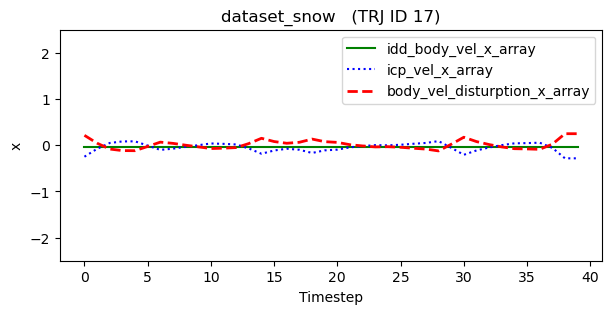

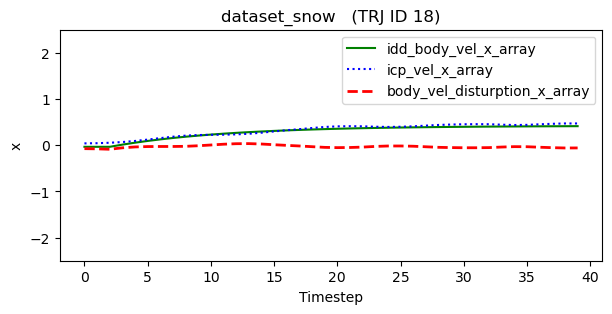

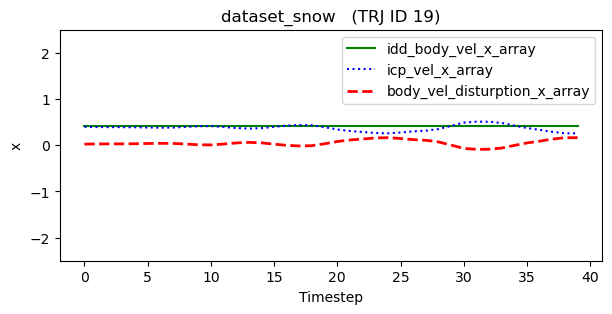

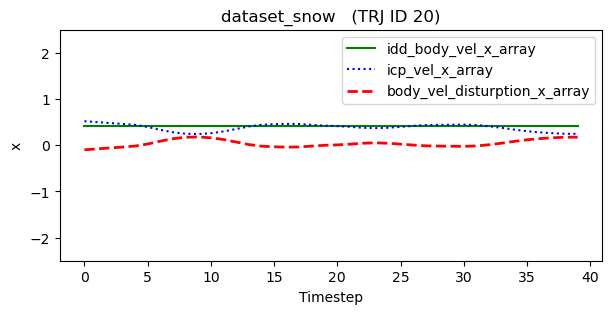

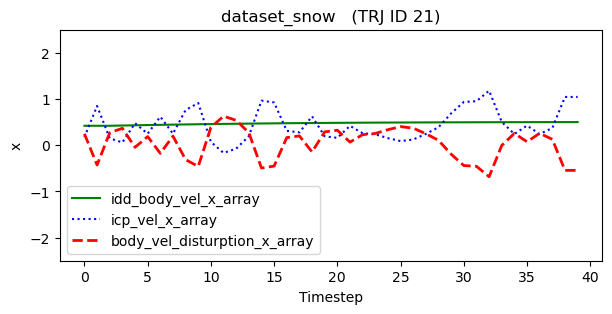

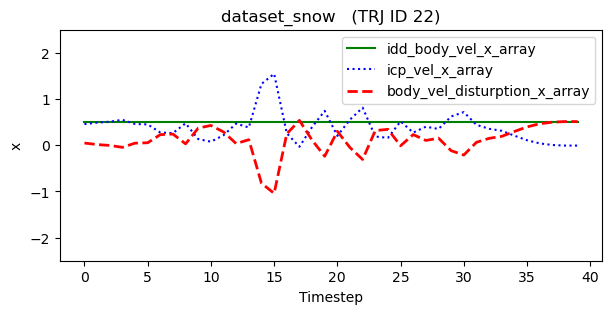

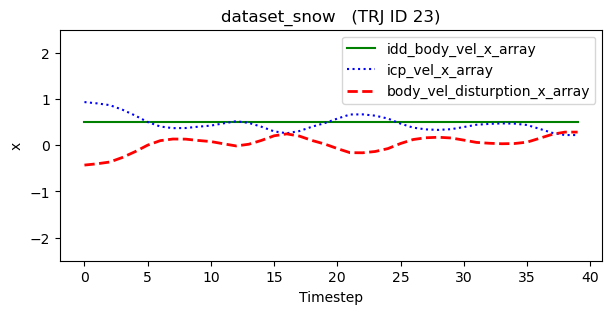

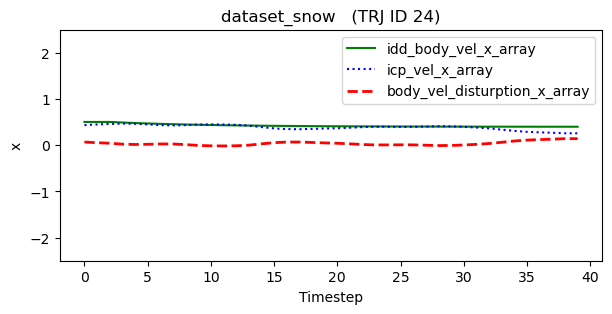

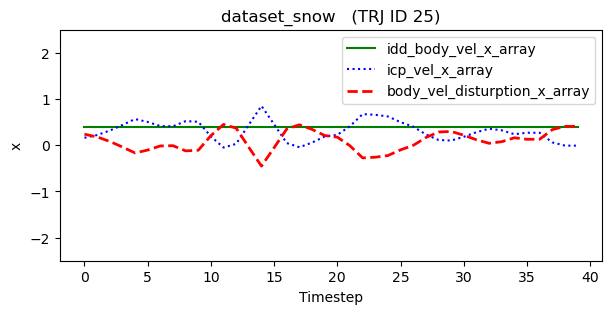

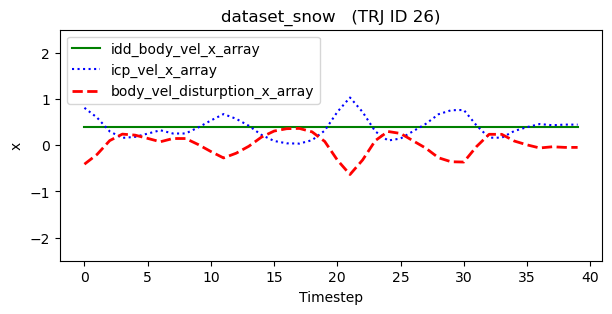

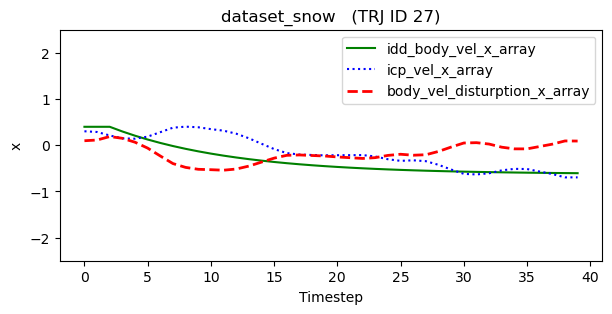

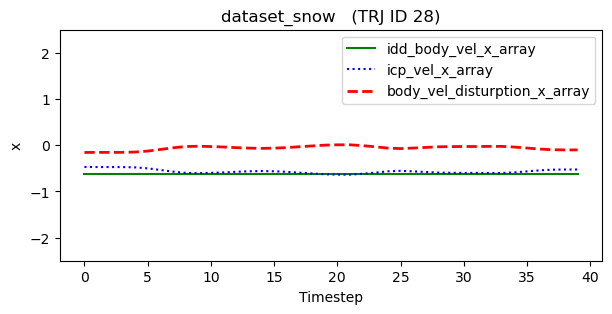

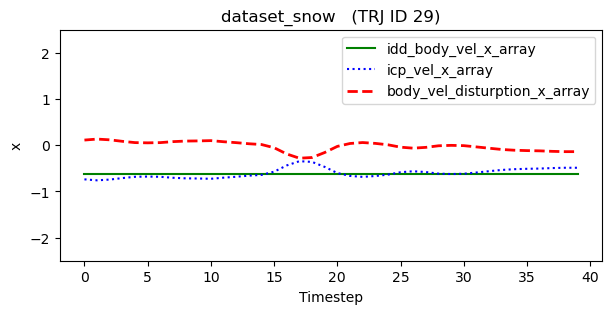

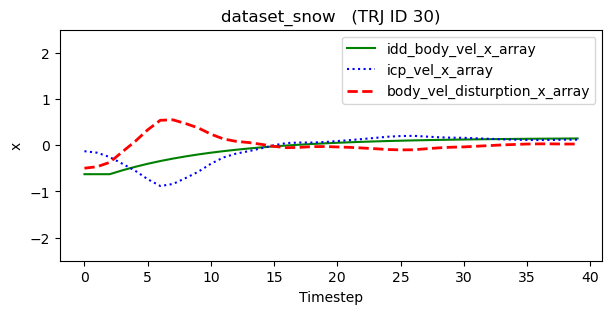

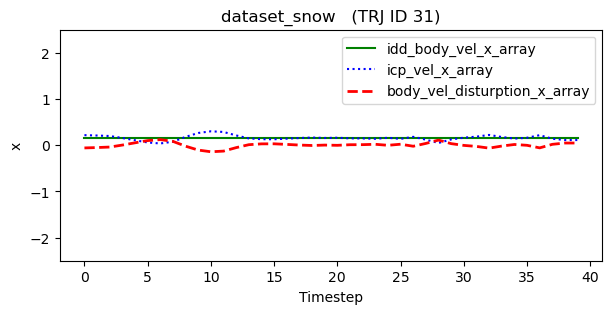

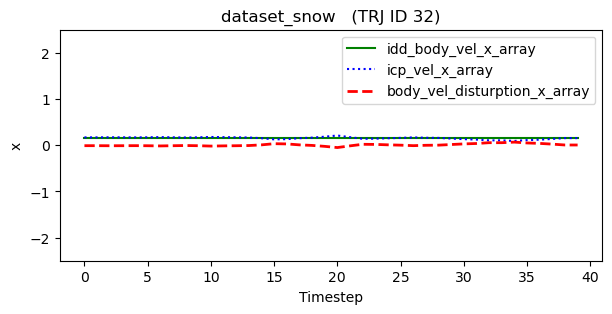

In [12]:
def plot_dataset_trajectory_x_array(trajectory_id: int, title: str, y_label:str, ylim: tuple=(-2.5, 2.5)):
    fig = plt.figure(num=None, figsize=(7,3), dpi=None, facecolor=None, edgecolor=None)
    plt.title(f'{title}   (TRJ ID {trajectory_id})')
    plt.plot(idd_body_vel_x_array[trajectory_id, :], label="idd_body_vel_x_array", color="green")
    plt.plot(icp_vel_x_array[trajectory_id, :], label="icp_vel_x_array", color="blue", linestyle="dotted")
    # plt.plot(icp_interpolated_x_array[trajectory_nb, :], label="icp_interpolated_yaw", color="lightgray", linestyle="dotted")
    plt.plot(body_vel_disturption_x_array[trajectory_id, :], label="body_vel_disturption_x_array", color="red", linestyle="dashed", linewidth="2.")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel('Timestep')
    plt.ylim(*ylim)
    return None

# _ids = [62,29,30,31,32]
_ids = range(17,33)
for _trj_id in _ids:
    plot_dataset_trajectory_x_array(trajectory_id=_trj_id, title="dataset_snow", y_label="x", ylim=(-2.5, 2.5))

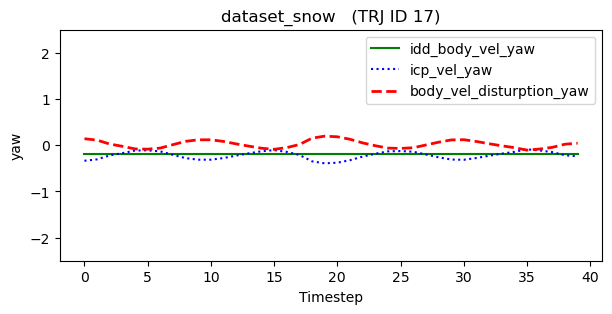

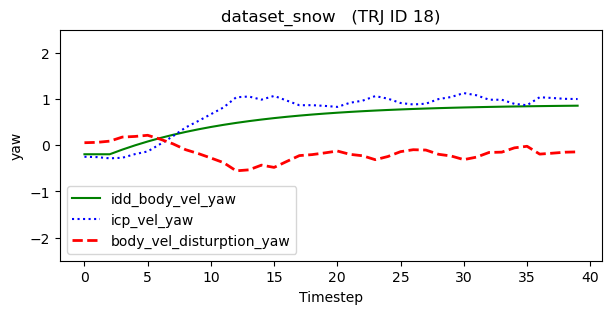

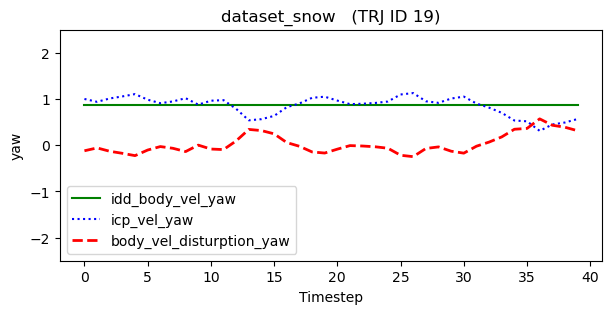

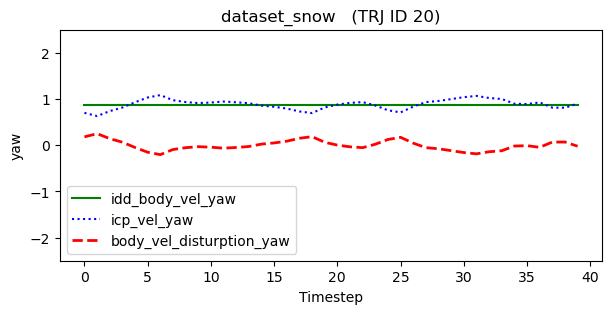

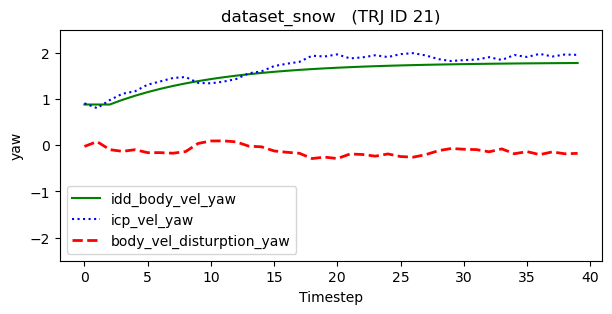

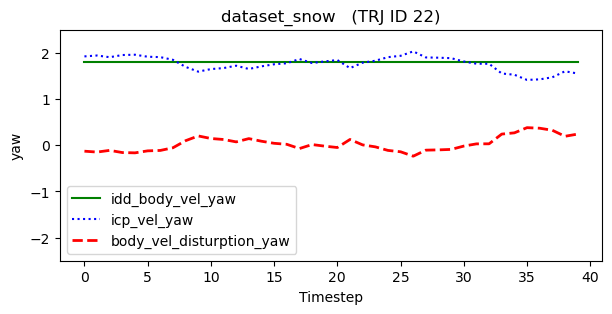

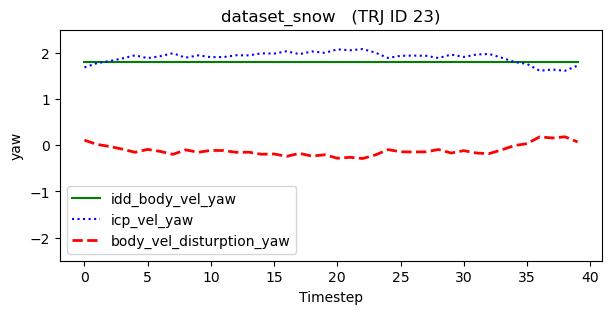

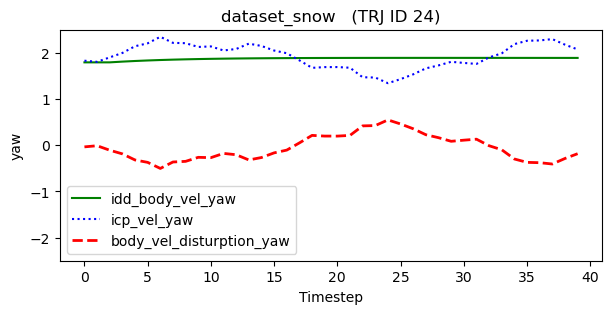

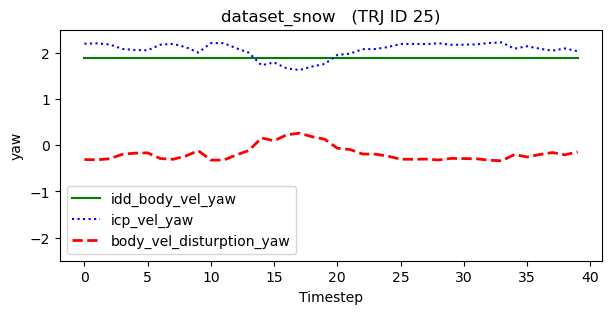

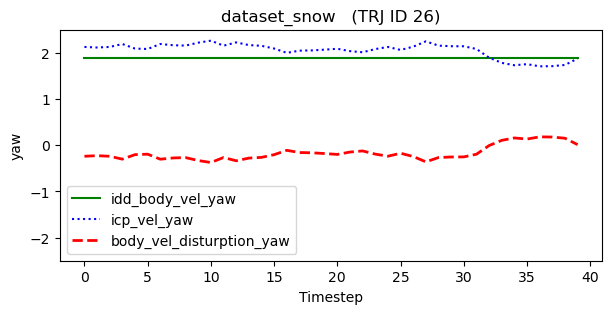

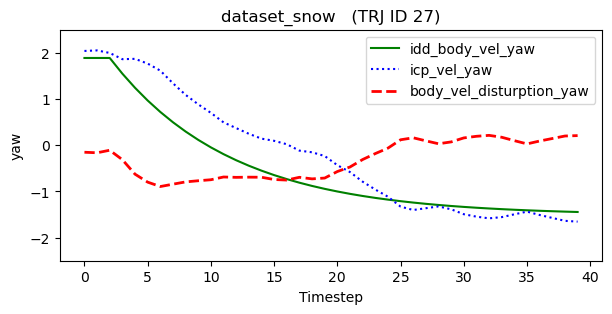

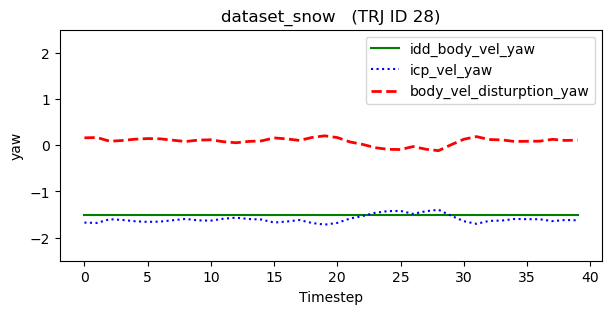

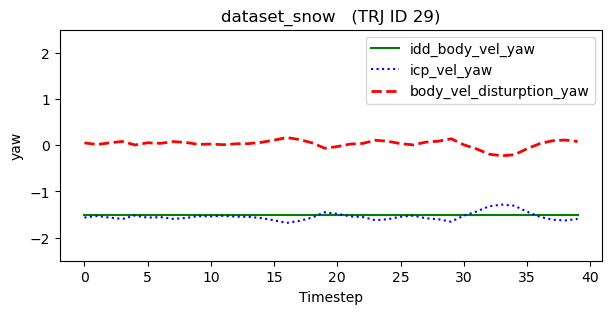

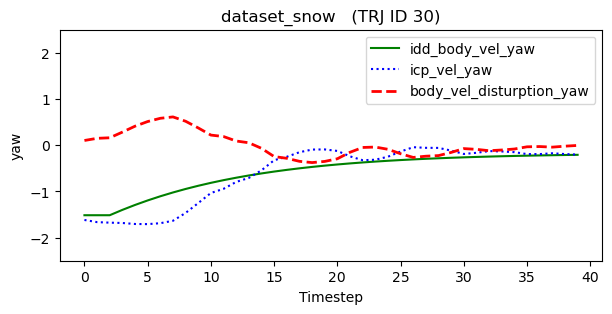

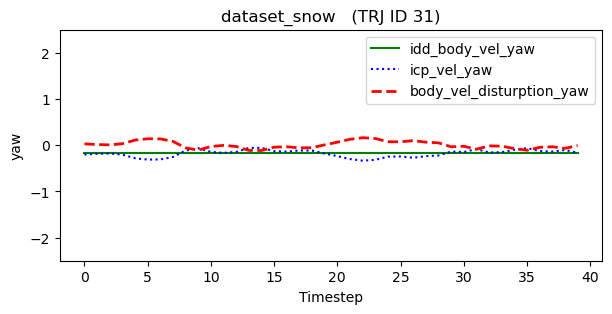

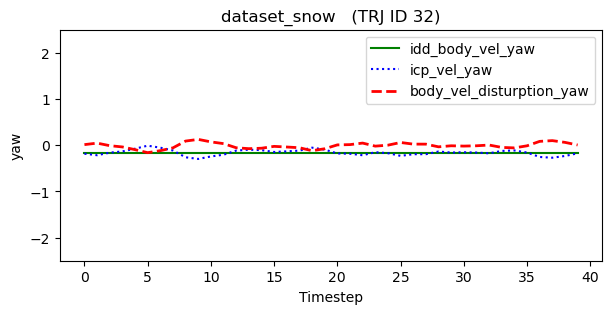

In [13]:
def plot_dataset_trajectory_yaw(trajectory_id: int, title: str, y_label:str, ylim: tuple=(-2.5, 2.5)):
    fig = plt.figure(num=None, figsize=(7,3), dpi=None, facecolor=None, edgecolor=None)
    plt.title(f'{title}   (TRJ ID {trajectory_id})')
    plt.plot(idd_body_vel_yaw_array[trajectory_id, :], label="idd_body_vel_yaw", color="green")
    plt.plot(icp_vel_yaw_array[trajectory_id, :], label="icp_vel_yaw", color="blue", linestyle="dotted")
    # plt.plot(icp_interpolated_yaw_array[trajectory_nb, :], label="icp_interpolated_yaw", color="lightgray", linestyle="dotted")
    plt.plot(body_vel_disturption_yaw_array[trajectory_id, :], label="body_vel_disturption_yaw", color="red", linestyle="dashed", linewidth="2.")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel('Timestep')
    plt.ylim(*ylim)
    return None

# _ids = [29,30,31,32]
_ids = range(17,33)
for _trj_id in _ids:
    plot_dataset_trajectory_yaw(trajectory_id=_trj_id, title="dataset_snow", y_label="yaw", ylim=(-2.5, 2.5))

In [14]:
# compute mean body vel disturbance for each steady-state window
n_windows = len(dataset_snow)

steady_state_mask = dataset_snow['steady_state_mask'].to_numpy() == True

steady_state_idd_body_vel_x = idd_body_vel_x_array[steady_state_mask]
steady_state_idd_body_vel_y = idd_body_vel_y_array[steady_state_mask]
steady_state_idd_body_vel_yaw = idd_body_vel_yaw_array[steady_state_mask]

steady_state_icp_body_vel_x = icp_vel_x_array[steady_state_mask]
steady_state_icp_body_vel_y = icp_vel_y_array[steady_state_mask]
steady_state_icp_body_vel_yaw = icp_vel_yaw_array[steady_state_mask]

steady_state_body_vel_disturption_x = body_vel_disturption_x_array[steady_state_mask]
steady_state_body_vel_disturption_y = body_vel_disturption_y_array[steady_state_mask]
steady_state_body_vel_disturption_yaw = body_vel_disturption_yaw_array[steady_state_mask]

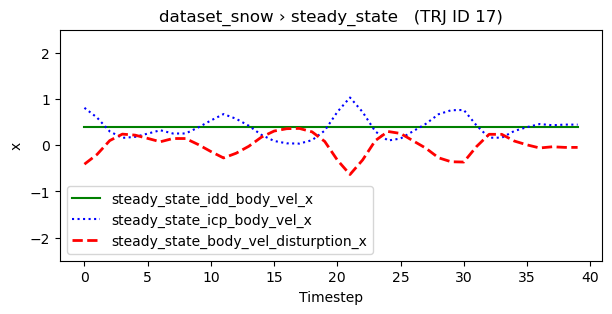

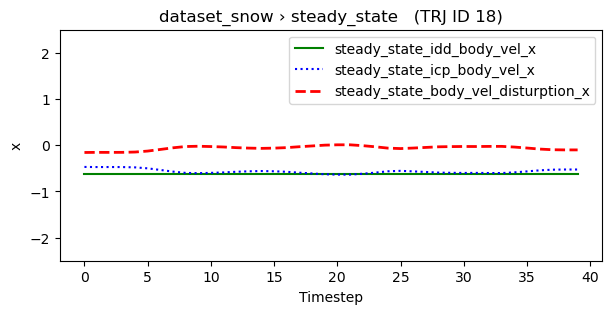

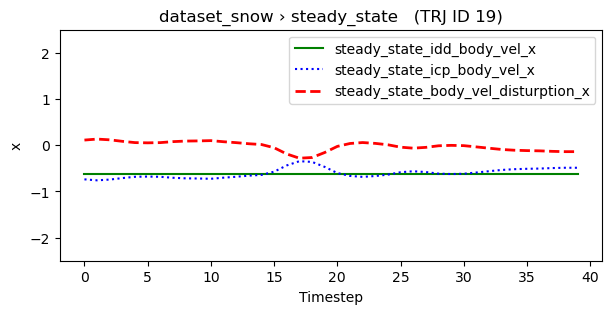

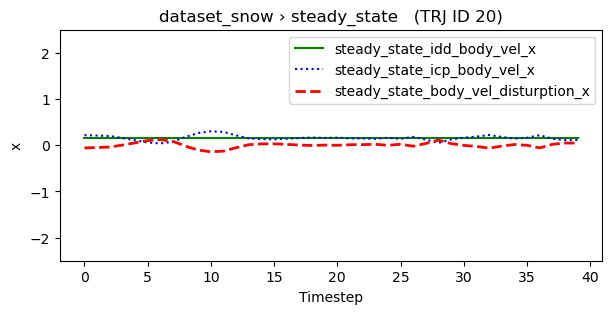

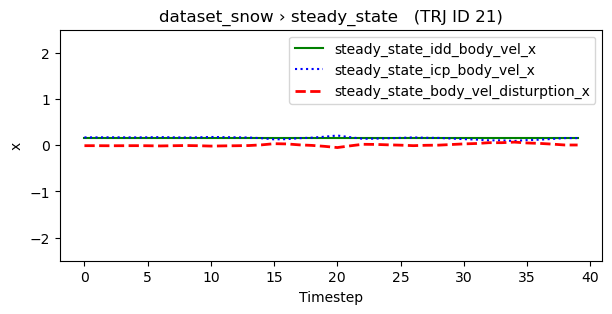

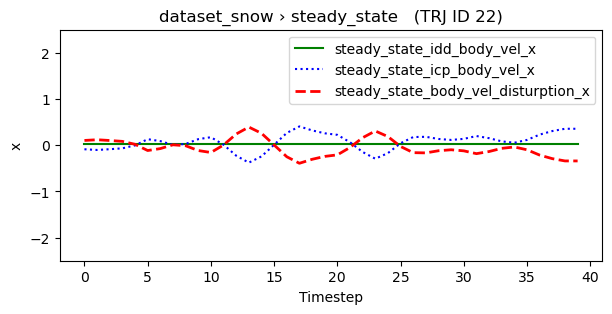

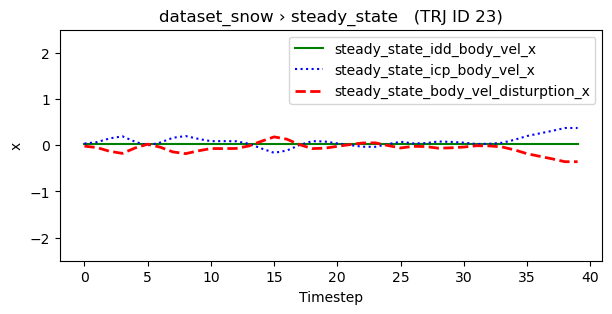

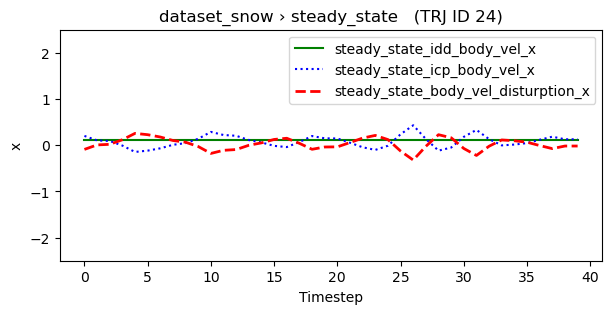

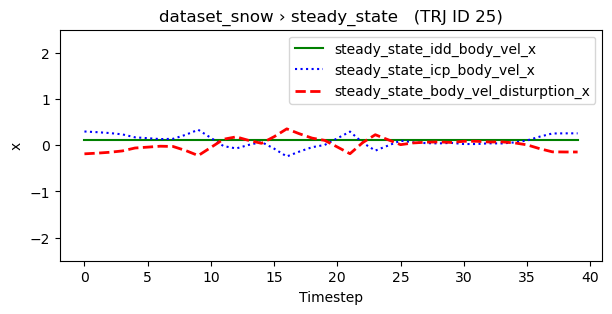

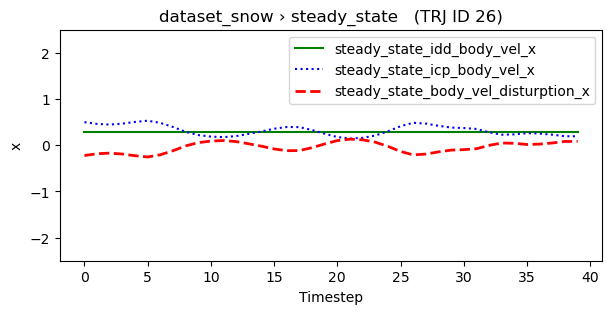

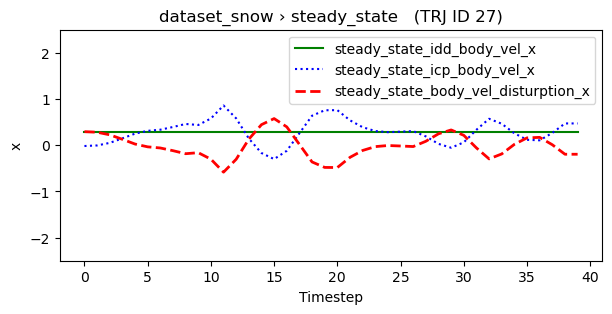

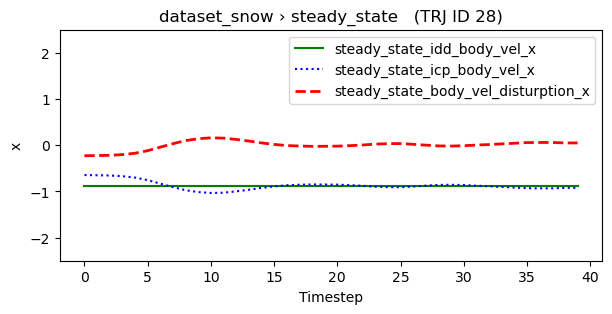

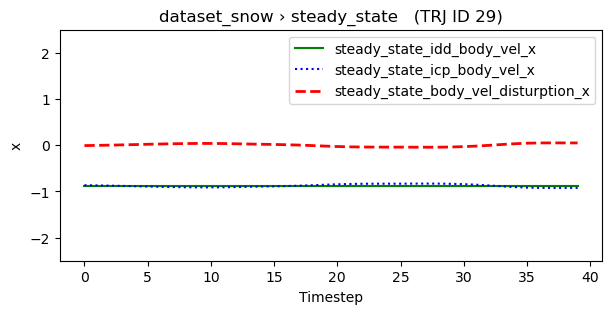

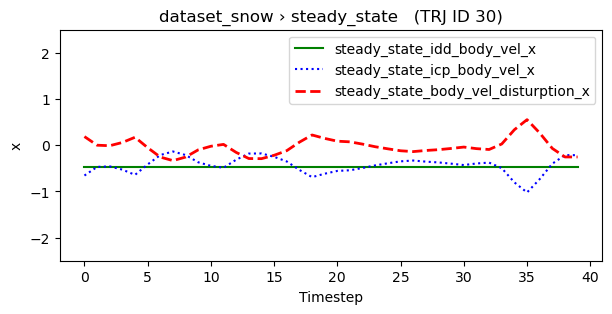

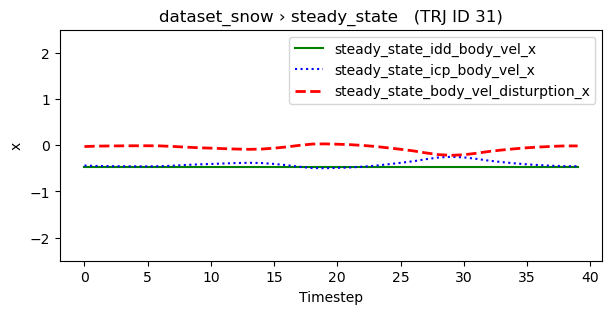

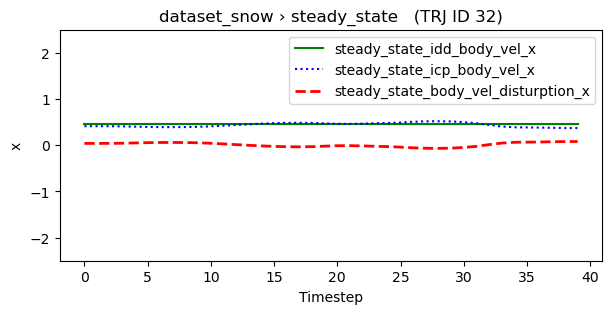

In [15]:
def plot_dataset_trajectory_steady_state_x_array(trajectory_id: int, title: str, y_label:str, ylim: tuple=(-2.5, 2.5)):
    fig = plt.figure(num=None, figsize=(7,3), dpi=None, facecolor=None, edgecolor=None)
    plt.title(f'{title}   (TRJ ID {trajectory_id})')
    plt.plot(steady_state_idd_body_vel_x[trajectory_id, :], label="steady_state_idd_body_vel_x", color="green")
    plt.plot(steady_state_icp_body_vel_x[trajectory_id, :], label="steady_state_icp_body_vel_x", color="blue", linestyle="dotted")
    plt.plot(steady_state_body_vel_disturption_x[trajectory_id, :], label="steady_state_body_vel_disturption_x", color="red", linestyle="dashed", linewidth="2.")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel('Timestep')
    plt.ylim(*ylim)
    return None

# _ids = [62,29,30,31,32]
_ids = range(17,33)
for _trj_id in _ids:
    plot_dataset_trajectory_steady_state_x_array(trajectory_id=_trj_id, title="dataset_snow › steady_state", y_label="x", ylim=(-2.5, 2.5))

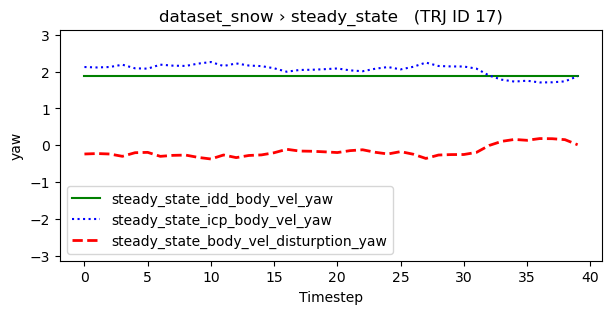

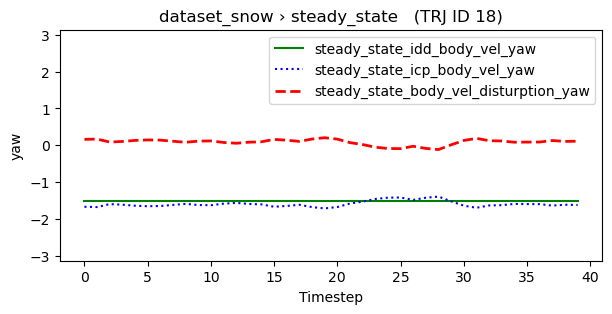

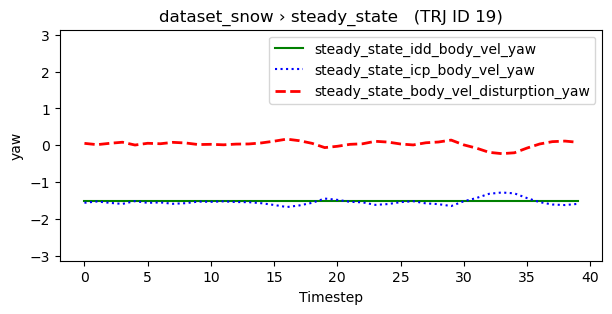

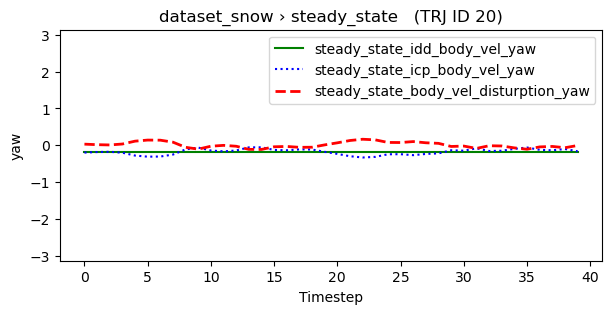

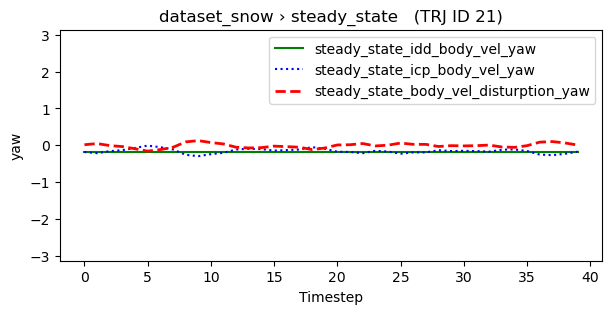

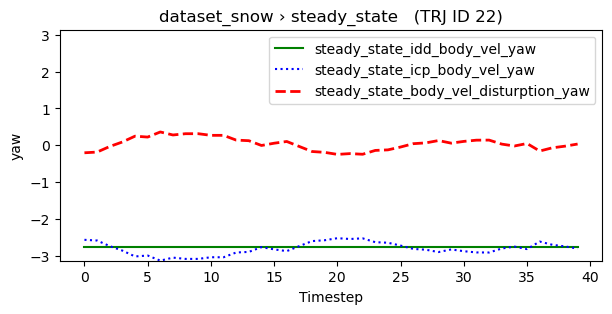

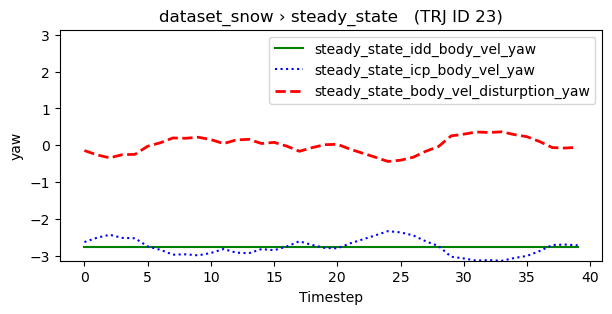

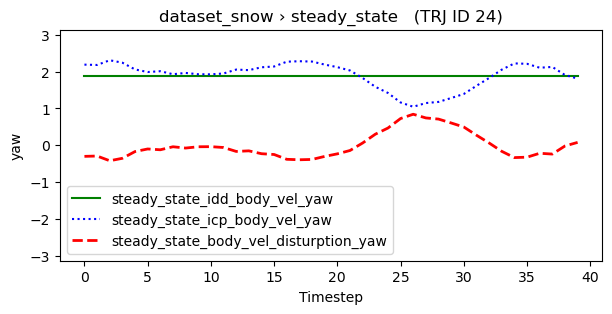

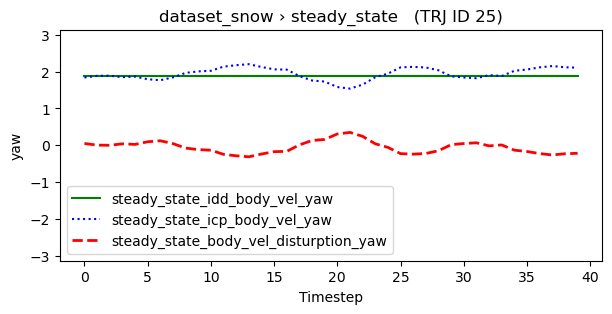

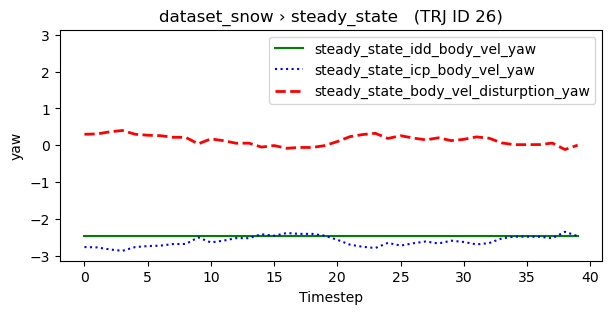

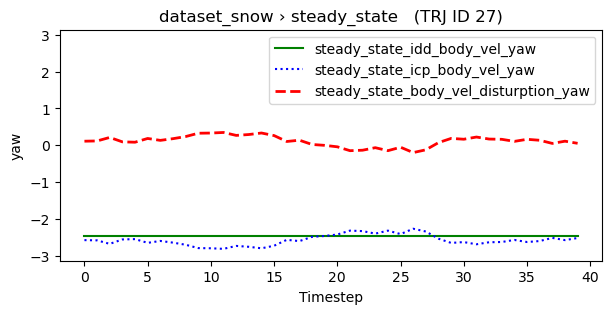

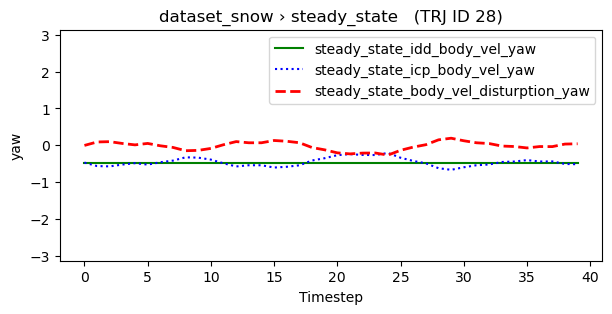

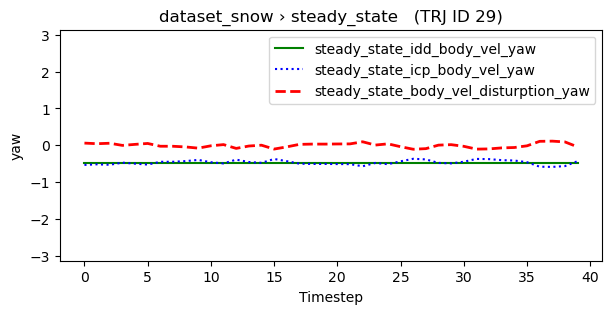

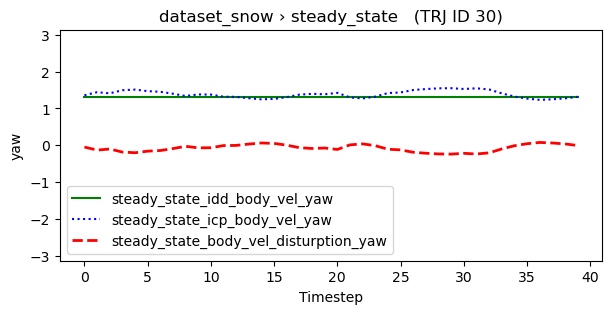

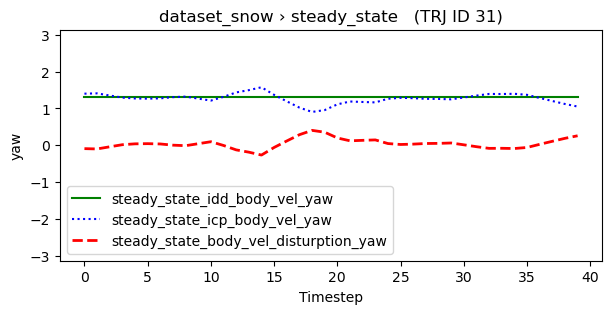

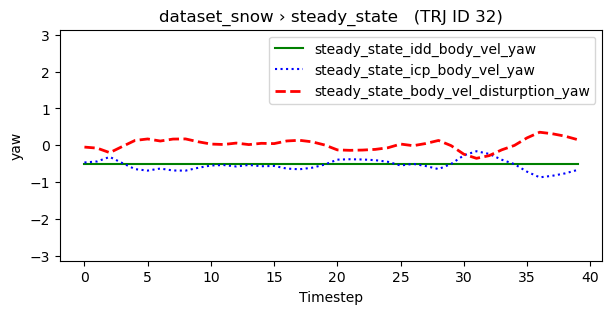

In [16]:
def plot_dataset_trajectory_steady_state_yaw(trajectory_id: int, title: str, y_label:str, ylim: tuple=(-2.5, 2.5)):
    fig = plt.figure(num=None, figsize=(7,3), dpi=None, facecolor=None, edgecolor=None)
    plt.title(f'{title}   (TRJ ID {trajectory_id})')
    plt.plot(steady_state_idd_body_vel_yaw[trajectory_id, :], label="steady_state_idd_body_vel_yaw", color="green")
    plt.plot(steady_state_icp_body_vel_yaw[trajectory_id, :], label="steady_state_icp_body_vel_yaw", color="blue", linestyle="dotted")
    plt.plot(steady_state_body_vel_disturption_yaw[trajectory_id, :], label="steady_state_body_vel_disturption_yaw", color="red", linestyle="dashed", linewidth="2.")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel('Timestep')
    plt.ylim(*ylim)
    return None

# _ids = [29,30,31,32]
_ids = range(17,33)
for _trj_id in _ids:
    plot_dataset_trajectory_steady_state_yaw(trajectory_id=_trj_id, title="dataset_snow › steady_state", y_label="yaw", ylim=(-3.1416, 3.1416))

In [17]:
# use mean values for each window as observations

trj_subset_mask = slice(0,100)
trj_subset_mask = slice(0,steady_state_body_vel_disturption_x.shape[0])

In [18]:
# compute mean body vel disturptions

mean_body_vel_disturption_x = np.mean(steady_state_body_vel_disturption_x, axis=1)[trj_subset_mask]
mean_body_vel_disturption_y = np.mean(steady_state_body_vel_disturption_y, axis=1)[trj_subset_mask]
mean_body_vel_disturption_yaw = np.mean(steady_state_body_vel_disturption_yaw, axis=1)[trj_subset_mask]

print(mean_body_vel_disturption_x.shape)

(206,)


In [19]:
x_train = np.column_stack((steady_state_idd_body_vel_x[trj_subset_mask, -1], steady_state_idd_body_vel_yaw[trj_subset_mask, -1]))

y_train_x = mean_body_vel_disturption_x[trj_subset_mask]
y_train_y = mean_body_vel_disturption_y[trj_subset_mask]
y_train_yaw = mean_body_vel_disturption_yaw[trj_subset_mask]

# print(x_train.shape)
# print(y_train_x.shape)

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.plot_wireframe(x_train[:, 0], x_train[:, 1], np.column_stack((y_train_x, y_train_yaw)), rstride=10, cstride=10)
# plt.show()

In [20]:
test_body_vel_disturption_x_array = dataset_test[str_body_vel_disturption_x_list].to_numpy()
test_body_vel_disturption_y_array = dataset_test[str_body_vel_disturption_y_list].to_numpy()
test_body_vel_disturption_yaw_array = dataset_test[str_body_vel_disturption_yaw_list].to_numpy()

test_idd_body_vel_x_array = dataset_test[idd_body_vel_x_str_list].to_numpy()
test_idd_body_vel_y_array = dataset_test[idd_body_vel_y_str_list].to_numpy()
test_idd_body_vel_yaw_array = dataset_test[idd_body_vel_yaw_str_list].to_numpy()

test_steady_state_mask = dataset_test['steady_state_mask'].to_numpy() == True

test_steady_state_idd_body_vel_x = test_idd_body_vel_x_array[test_steady_state_mask]
test_steady_state_idd_body_vel_y = test_idd_body_vel_y_array[test_steady_state_mask]
test_steady_state_idd_body_vel_yaw = test_idd_body_vel_yaw_array[test_steady_state_mask]

test_steady_state_body_vel_disturption_x = test_body_vel_disturption_x_array[test_steady_state_mask]
test_steady_state_body_vel_disturption_y = test_body_vel_disturption_y_array[test_steady_state_mask]
test_steady_state_body_vel_disturption_yaw = test_body_vel_disturption_yaw_array[test_steady_state_mask]

In [0]:
test_mean_body_vel_disturption_x = np.mean(test_steady_state_body_vel_disturption_x, axis=1)
test_mean_body_vel_disturption_y = np.mean(test_steady_state_body_vel_disturption_y, axis=1)
test_mean_body_vel_disturption_yaw = np.mean(test_steady_state_body_vel_disturption_yaw, axis=1)
# print(test_mean_body_vel_disturption_x.shape)

In [21]:
x_test = np.column_stack((test_steady_state_idd_body_vel_x[trj_subset_mask, -1], test_steady_state_idd_body_vel_yaw[trj_subset_mask, -1]))

y_test_x = test_mean_body_vel_disturption_x[trj_subset_mask]
y_test_y = test_mean_body_vel_disturption_y[trj_subset_mask]
y_test_yaw = test_mean_body_vel_disturption_yaw[trj_subset_mask]

In [22]:
# Create gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel_x = 1.0 * RBF(length_scale=[0.1, 0.1]) * RBF(length_scale=[0.1, 0.1]) + WhiteKernel(noise_level=1.1)
kernel_y = 1.0 * RBF(length_scale=[0.1, 0.1]) + WhiteKernel(noise_level=0.1)

gpr_x = GaussianProcessRegressor(kernel=kernel_x, n_restarts_optimizer=20, alpha = 0.0).fit(x_train, y_train_x)
gpr_y = GaussianProcessRegressor(kernel=kernel_y, n_restarts_optimizer=20, alpha = 0.0).fit(x_train, y_train_y)

In [23]:
from sklearn.gaussian_process.kernels import ExpSineSquared

# kernel_yaw = 1.0 * RBF(length_scale=[0.1, 0.1]) + WhiteKernel(noise_level=0.1)
# kernel_yaw = 1.0 * RBF(length_scale=[0.01, 0.01]) * RBF(length_scale=[0.01, 0.01]) + RBF(length_scale=[0.01, 0.01])+ WhiteKernel(noise_level=1.9)
# kernel_yaw = 1.0 * RBF(length_scale=[1e-2, 1e-2], length_scale_bounds=[(1e-2, 1e3), (1e-2, 1e3)]) + WhiteKernel(noise_level=[1e-2, 1e-2], noise_level_bounds=[(1e-2, 1e3), (1e-2, 1e3)])
# kernel_yaw = 1.0 * RBF(length_scale=[1e-2, 1e-2], length_scale_bounds=[(1e-3, 1e1), (1e-3, 1e1)]) + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-5, 1e3))
kernel_yaw = 1.0 * (RBF(length_scale=[2e-1, 2e-1], length_scale_bounds=[(1e-3, 3e-1), (1e-3, 3e-1)]) *  ExpSineSquared(length_scale=2e-1, length_scale_bounds=(1e-3, 6e-1))) + WhiteKernel(noise_level=2e-1, noise_level_bounds=(1e-3, 2e-1))

gpr_yaw = GaussianProcessRegressor(kernel=kernel_yaw, n_restarts_optimizer=20, alpha = 0.0).fit(x_train, y_train_yaw)

/Users/redleader/.conda/envs/norlab_WMRD/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__k1__length_scale is close to the specified upper bound 0.3. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [24]:
## print train fit score for each dimension

print('gpr_x: ', gpr_x.score(x_train, y_train_x),
'\t\t kernel fct: ', gpr_x.kernel_)
print('gpr_y: ', gpr_y.score(x_train, y_train_y),
'\t\t kernel fct: ', gpr_y.kernel_)
print('gpr_yaw: ', gpr_yaw.score(x_train, y_train_yaw),
'\t\t kernel fct: ', gpr_yaw.kernel_)

gpr_x:  0.690828771206107 		 kernel fct:  0.111**2 * RBF(length_scale=[1.5, 4.08]) * RBF(length_scale=[1.16, 1.74]) + WhiteKernel(noise_level=0.000781)
gpr_y:  0.9106022534014016 		 kernel fct:  0.379**2 * RBF(length_scale=[8.13, 8.82]) + WhiteKernel(noise_level=0.000854)
gpr_yaw:  0.8378089730587913 		 kernel fct:  0.101**2 * RBF(length_scale=[0.138, 0.3]) * ExpSineSquared(length_scale=0.0902, periodicity=6.76e+04) + WhiteKernel(noise_level=0.00341)


In [25]:
## print test fit score for each dimension

print('gpr_x test: ', gpr_x.score(x_test, y_test_x))
print('gpr_y test: ', gpr_y.score(x_test, y_test_y))
print('gpr_yaw test: ', gpr_yaw.score(x_test, y_test_yaw))

gpr_x test:  0.6323925855016808
gpr_y test:  0.8542216078405569
gpr_yaw test:  0.38401027151157896


In [26]:
# # === Disturption SUM ================================================================================
#
# sum_body_vel_disturption_x = np.sum(steady_state_body_vel_disturption_x, axis=1)
# sum_body_vel_disturption_y = np.sum(steady_state_body_vel_disturption_y, axis=1)
# sum_body_vel_disturption_yaw = np.sum(steady_state_body_vel_disturption_yaw, axis=1)
#
# test_sum_body_vel_disturption_x = np.sum(test_steady_state_body_vel_disturption_x, axis=1)
# test_sum_body_vel_disturption_y = np.sum(test_steady_state_body_vel_disturption_y, axis=1)
# test_sum_body_vel_disturption_yaw = np.sum(test_steady_state_body_vel_disturption_yaw, axis=1)
#
#
# x_train_alt = np.column_stack((steady_state_idd_body_vel_x[:, 0], steady_state_idd_body_vel_yaw[:, 0]))
#

In [27]:
# kernel_x_sum = 1.0 * RBF(length_scale=[0 1, 0.1]) + WhiteKernel(noise_level=0.1)
# gpr_x_sum = GaussianProcessRegressor(kernel=kernel_x_sum, n_restarts_optimizer=20).fit(X=x_train_alt, y=sum_body_vel_disturption_x)

In [28]:
# kernel_y_sum = 1.0 * RBF(length_scale=[0.1, 0.1]) + WhiteKernel(noise_level=0.1)
# gpr_y_sum = GaussianProcessRegressor(kernel=kernel_y_sum, n_restarts_optimizer=20).fit(X=x_train_alt, y=sum_body_vel_disturption_y)

In [29]:
# kernel_yaw_sum = 1.0 * RBF(length_scale=[0.6, 0.6]) + RBF(length_scale=[0.3, 0.9]) + WhiteKernel(noise_level=0.1)
# gpr_yaw_sum = GaussianProcessRegressor(kernel=kernel_yaw_sum, n_restarts_optimizer=20).fit(X=x_train_alt, y=sum_body_vel_disturption_yaw)

In [30]:
# print('TRAIN SET:')
# _space=' '*3
# print(_space, 'gpr_x_sum score:', gpr_x_sum.score(x_train_alt, sum_body_vel_disturption_x))
# print(_space, 'gpr_y_sum score:', gpr_y_sum.score(x_train_alt, sum_body_vel_disturption_y))
# print(_space, 'gpr_yaw_sum score:', gpr_yaw_sum.score(x_train_alt, sum_body_vel_disturption_yaw))

In [31]:
# print('TEST SET:')
# print(_space, 'gpr_x_sum score:', gpr_x_sum.score(x_test, test_sum_body_vel_disturption_x))
# print(_space, 'gpr_y_sum score:', gpr_y_sum.score(x_test, test_sum_body_vel_disturption_y))
# print(_space, 'gpr_yaw_sum score:', gpr_yaw_sum.score(x_test, test_sum_body_vel_disturption_yaw))

In [32]:
# _xx_axe = np.linspace(start=[x_train_alt[:,0].min(),x_train_alt[:,1].min()], stop=[x_train_alt[:,0].max(),x_train_alt[:,1].max()])
# y_mean, y_std = gpr_yaw_sum.predict(_xx_axe, return_std=True)

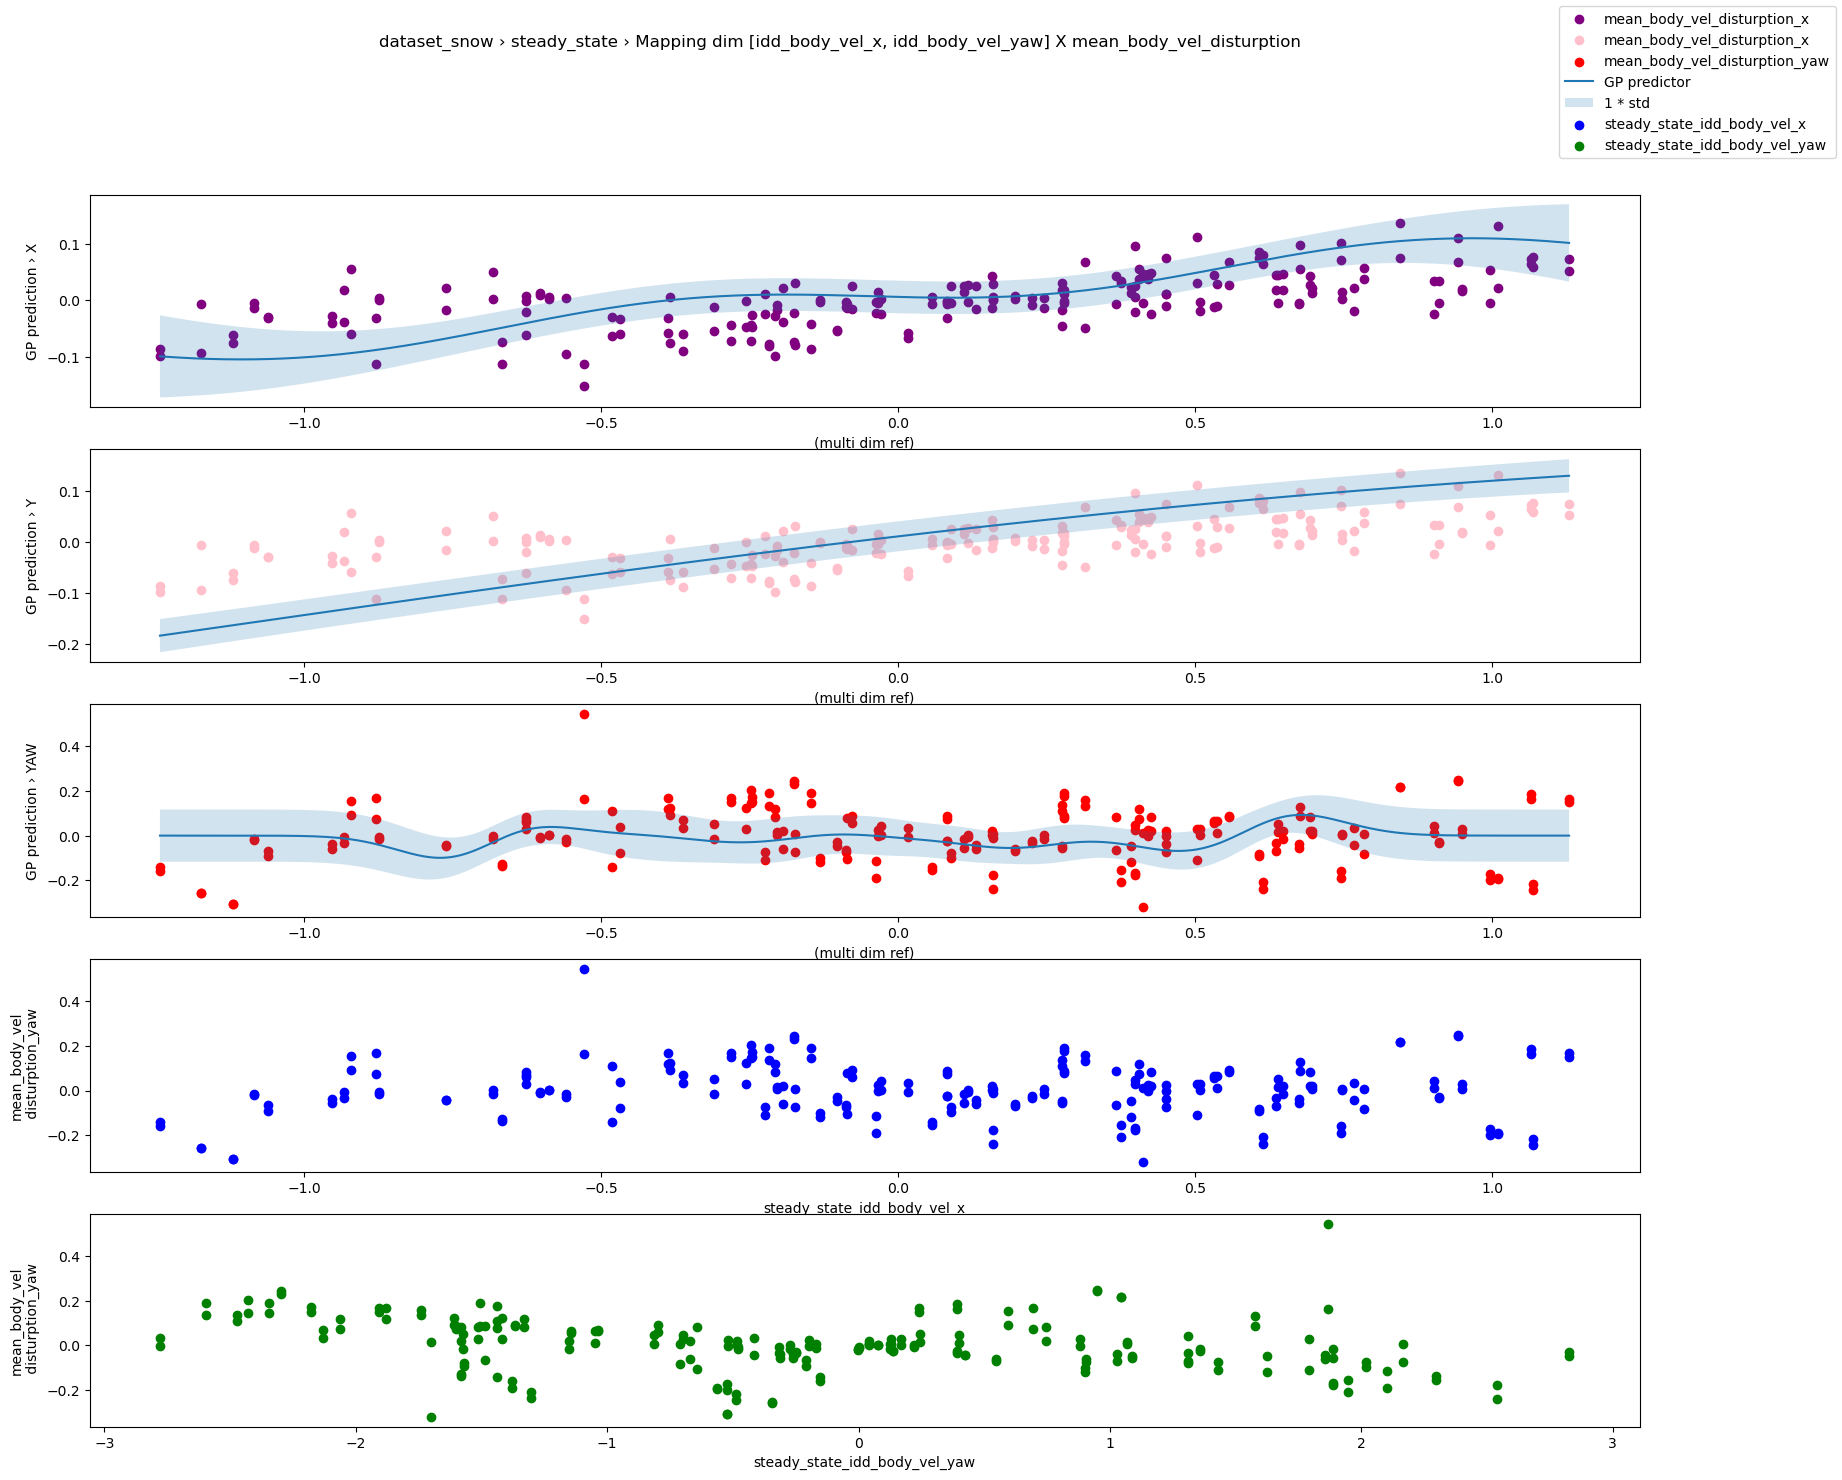

In [33]:
XtrainDimension = ('steady_state_idd_body_vel_x', 'steady_state_idd_body_vel_yaw')
def plot_dataset_trajectory_steady_state_yaw(_x_train:np.ndarray, _x_train_dim:tuple, gp_yaw:GaussianProcessRegressor, gp_x:GaussianProcessRegressor, gp_y:GaussianProcessRegressor, title: str, y_label:str='yaw', ylim: tuple=(-2.5, 2.5)):
    # fig = plt.figure(num=None, figsize=(20,7), dpi=None, facecolor=None, edgecolor=None)
    fig = plt.figure(figsize=(20,16))
    # fig, ax = plt.subplots(figsize=(20,14), nrows=_x_train.shape[1])
    # fig.subplots_adjust(wspace=0.1, hspace=0.1)

    _nb_std = 1

    _x_axe = np.linspace(start=[_x_train[:,0].min(),_x_train[:,1].min()], stop=[_x_train[:,0].max(),_x_train[:,1].max()], num=1000)
    _x_train_dim_nb = _x_train.shape[1]

    _gpX_y_mean, _gpX_y_std = gp_x.predict(_x_axe, return_std=True)
    ax = fig.add_subplot(_x_train_dim_nb+3,1,1) # row-col-num
    ax.set_xlabel('(multi dim ref)')
    ax.set_ylabel('GP prediction › X')
    ax.scatter(x=_x_train[:,0], y=mean_body_vel_disturption_x, label='mean_body_vel_disturption_x', color='purple')
    ax.plot(_x_axe[:,0], _gpX_y_mean,)
    ax.fill_between(_x_axe[:,0], _gpX_y_mean + _nb_std * _gpX_y_std, _gpX_y_mean - _nb_std * _gpX_y_std, alpha=0.2, )

    _gpY_y_mean, _gpY_y_std = gp_y.predict(_x_axe, return_std=True)
    ax = fig.add_subplot(_x_train_dim_nb+3,1,2) # row-col-num
    ax.set_xlabel('(multi dim ref)')
    ax.set_ylabel('GP prediction › Y')
    ax.scatter(x=_x_train[:,0], y=mean_body_vel_disturption_x, label='mean_body_vel_disturption_x', color='pink')
    ax.plot(_x_axe[:,0], _gpY_y_mean,)
    ax.fill_between(_x_axe[:,0], _gpY_y_mean + _nb_std * _gpY_y_std, _gpY_y_mean - _nb_std * _gpY_y_std, alpha=0.2, )


    _gpYaw_y_mean, _gpYaw_y_std = gp_yaw.predict(_x_axe, return_std=True)
    ax = fig.add_subplot(_x_train_dim_nb+3,1,3) # row-col-num
    ax.set_xlabel('(multi dim ref)')
    ax.set_ylabel('GP prediction › YAW')
    ax.scatter(x=_x_train[:,0], y=mean_body_vel_disturption_yaw, label='mean_body_vel_disturption_yaw', color='red')
    ax.plot(_x_axe[:,0], _gpYaw_y_mean, label="GP predictor")
    ax.fill_between(_x_axe[:,0], _gpYaw_y_mean + _nb_std * _gpYaw_y_std, _gpYaw_y_mean - _nb_std * _gpYaw_y_std, alpha=0.2, label=f'{_nb_std} * std')

    _colors=['blue', 'green']
    for each_dim in range(_x_train_dim_nb):
        ax = fig.add_subplot(_x_train_dim_nb+3,1,each_dim+4) # row-col-num
        ax.set_xlabel(_x_train_dim[each_dim])
        ax.set_ylabel(y_label)

        ax.scatter(x=_x_train[:,each_dim], y=mean_body_vel_disturption_yaw, label=_x_train_dim[each_dim], color=_colors[each_dim])
        # if ylim:
        #     ax.set_ylim(*ylim)

    fig.suptitle(f'{title}')
    fig.legend()
    return None

plot_dataset_trajectory_steady_state_yaw(_x_train=x_train, _x_train_dim=XtrainDimension, gp_yaw=gpr_yaw, gp_x=gpr_x, gp_y=gpr_y, title="dataset_snow › steady_state › Mapping dim [idd_body_vel_x, idd_body_vel_yaw] X mean_body_vel_disturption", y_label="mean_body_vel\n disturption_yaw", ylim=(-20,20))
